In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot roo
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

'/mnt/c/Users/saeran2/master/git/astrobot/resources/epw/philadelphia/philadelphia.epw'

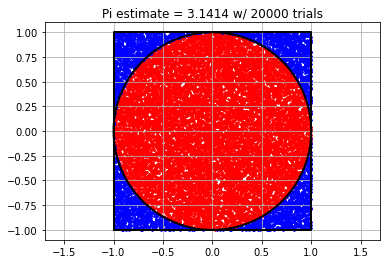

In [24]:
import scipy.stats as st

# Theory: unit square / unit circle = pi
# pi r^2 / r^2 = pi but square should be bigger so...
# pi r^2 / (2r)^2 = pi / 4


# Draw unit circle, square
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta) * 1
y_circle = np.sin(theta) * 1
x_square = np.array([0, 2, 2, 0, 0]) - 1
y_square = np.array([0, 0, 2, 2, 0]) - 1
plt.plot(x_circle, y_circle, 'black', linewidth=2)
plt.plot(x_square, y_square, 'black', linewidth=2)


N = 20000  # trials
X = np.random.uniform(-1, 1, N)
Y = np.random.uniform(-1, 1, N)
# Get radius of all points
rad_arr = np.sqrt((X ** 2) + (Y ** 2))
# Get boolean mask of points in circle
in_circle = rad_arr < 1.0  
# Get value of pi from 0 to 500th step 
pi = 4 * np.cumsum(in_circle) / np.arange(1, N+1)

_ = plt.scatter(X[in_circle], Y[in_circle], c='red', s=3)
_ = plt.scatter(X[~in_circle], Y[~in_circle], c='blue', s=3)
_ = plt.axis('equal')
_ = plt.grid()
_ = plt.title('Pi estimate = {} w/ {} trials'.format(pi[-1], N))

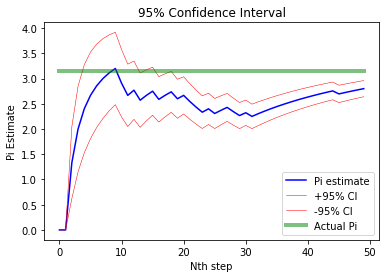

In [26]:
# https://math.stackexchange.com/questions/2493445/error-in-calculation-of-pi-using-monte-carlo-method

v = np.s_[:50]
est_error = [1.96 * np.std(pi[:i]) / np.sqrt(i) for i in range(1, N+1)]
N_arr = np.arange(len(pi[v]))

_ = plt.plot(N_arr, pi[v], c='blue')
_ = plt.plot(N_arr, pi[v] + est_error[v], c='red', linewidth=0.5)
_ = plt.plot(N_arr, pi[v] - est_error[v], c='red', linewidth=0.5)
_ = plt.plot(N_arr, np.ones(len(N_arr)) * np.pi, c='green', linewidth=4, alpha=0.5)
_ = plt.title('95% Confidence Interval')
_ = plt.ylabel('Pi Estimate'); plt.xlabel('Nth step')
_ = plt.legend(['Pi estimate', '+95% CI', '-95% CI', 'Actual Pi'])

In [42]:
M = 200
X = np.random.uniform(-1, 1, M)
Y = np.random.uniform(-1, 1, M)
    
pi = np.zeros(M)
for i in range(M):
    N = i + 1  # trials
    _X = np.random.choice(X, size=N, replace=True) 
    _Y = np.random.choice(Y, size=N, replace=True)
    # Get radius of all points
    rad_arr = np.sqrt((_X ** 2) + (_Y ** 2))
    # Get boolean mask of points in circle
    in_circle = rad_arr < 1.0  
    pi[i] = 4 * np.sum(in_circle) / N

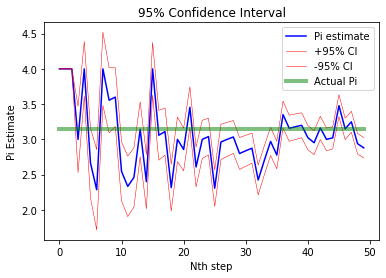

In [43]:
v = np.s_[:50]
N_arr = np.arange(len(pi[v]))
est_error = [2.17 * np.std(pi[:i]) / np.sqrt(i) for i in range(1, M+1)]

_ = plt.plot(N_arr, pi[v], c='blue')
_ = plt.plot(N_arr, pi[v] + est_error[v], c='red', linewidth=0.5)
_ = plt.plot(N_arr, pi[v] - est_error[v], c='red', linewidth=0.5)
_ = plt.plot(N_arr, np.ones(len(N_arr)) * np.pi, c='green', linewidth=4, alpha=0.5)
_ = plt.title('95% Confidence Interval')
_ = plt.ylabel('Pi Estimate'); plt.xlabel('Nth step')
_ = plt.legend(['Pi estimate', '+95% CI', '-95% CI', 'Actual Pi'])